/var/folders/8v/frb1qkxn6tvb4c7lz7kfr90r0000gn/T/ipykernel_35600/729530994.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg = pd.read_sql(query_avg, conn)


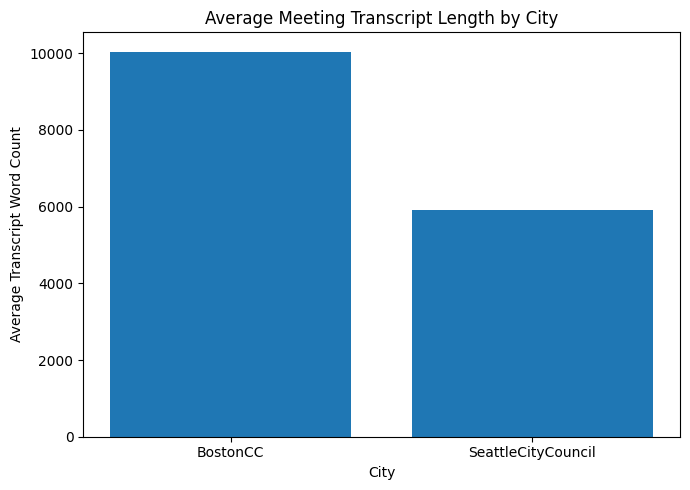

/var/folders/8v/frb1qkxn6tvb4c7lz7kfr90r0000gn/T/ipykernel_35600/729530994.py:52: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_count = pd.read_sql(query_count, conn)


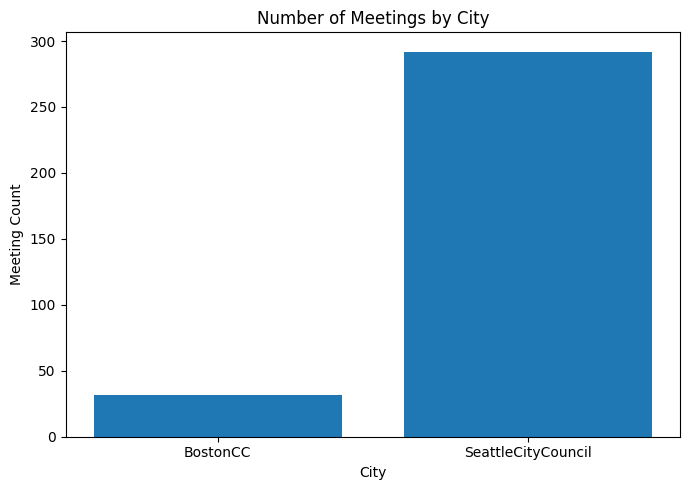

/var/folders/8v/frb1qkxn6tvb4c7lz7kfr90r0000gn/T/ipykernel_35600/729530994.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top10 = pd.read_sql(query_top10, conn)


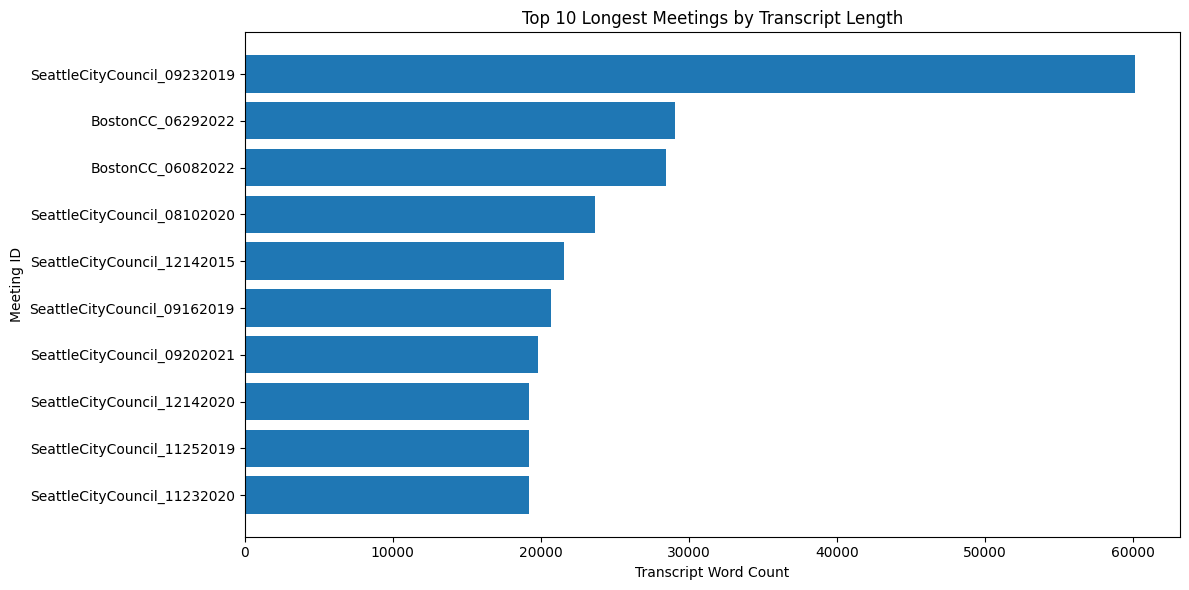

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# PostgreSQL CONNECTION
# -----------------------------
conn = psycopg2.connect(
    dbname="meetingbank",
    user="sushma",
    host="localhost",
    port="5432"
)

# -----------------------------
# VISUALIZATION 1
# Average Transcript Length by City
# -----------------------------
query_avg = """
SELECT
    dc.city_name,
    AVG(fm.transcript_word_count) AS avg_transcript_length
FROM fact_meetings fm
JOIN dim_city dc ON fm.city_id = dc.city_id
GROUP BY dc.city_name;
"""

df_avg = pd.read_sql(query_avg, conn)

plt.figure(figsize=(7, 5))
plt.bar(df_avg["city_name"], df_avg["avg_transcript_length"])
plt.title("Average Meeting Transcript Length by City")
plt.xlabel("City")
plt.ylabel("Average Transcript Word Count")
plt.tight_layout()
plt.show()


# -----------------------------
# VISUALIZATION 2
# Number of Meetings per City
# -----------------------------
query_count = """
SELECT
    dc.city_name,
    COUNT(*) AS meeting_count
FROM fact_meetings fm
JOIN dim_city dc ON fm.city_id = dc.city_id
GROUP BY dc.city_name;
"""

df_count = pd.read_sql(query_count, conn)

plt.figure(figsize=(7, 5))
plt.bar(df_count["city_name"], df_count["meeting_count"])
plt.title("Number of Meetings by City")
plt.xlabel("City")
plt.ylabel("Meeting Count")
plt.tight_layout()
plt.show()


# -----------------------------
# VISUALIZATION 3
# Top 10 Longest Meetings
# -----------------------------
query_top10 = """
SELECT
    fm.meeting_id,
    dc.city_name,
    fm.transcript_word_count
FROM fact_meetings fm
JOIN dim_city dc ON fm.city_id = dc.city_id
ORDER BY fm.transcript_word_count DESC
LIMIT 10;
"""

df_top10 = pd.read_sql(query_top10, conn)

plt.figure(figsize=(12, 6))
plt.barh(df_top10["meeting_id"], df_top10["transcript_word_count"])
plt.xlabel("Transcript Word Count")
plt.ylabel("Meeting ID")
plt.title("Top 10 Longest Meetings by Transcript Length")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -----------------------------
# CLOSE CONNECTION
# -----------------------------
conn.close()
